<a href="https://colab.research.google.com/github/Dharanish2/Codsoft-project/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the Libraries for the Data Processing and Modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
#Linking the datasets to colab
import io
df_data = pd.read_csv(io.BytesIO(uploaded['IRIS.csv']))

In [4]:
df_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df_data.shape

(150, 5)

Data Pre-Processing

In [8]:
#Checking the null values
print("\nMissing Values:\n", df_data.isnull().sum())


Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Import needed libaries used for encoding
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [12]:
for i in df_data.columns:
  if is_numeric_dtype(df_data[i]):
    continue
  else:
    df_data[i] = le.fit_transform(df_data[i])

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<ipython-input-14-555aa3b3dfcf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'species', data = df_data, palette = "Set2")


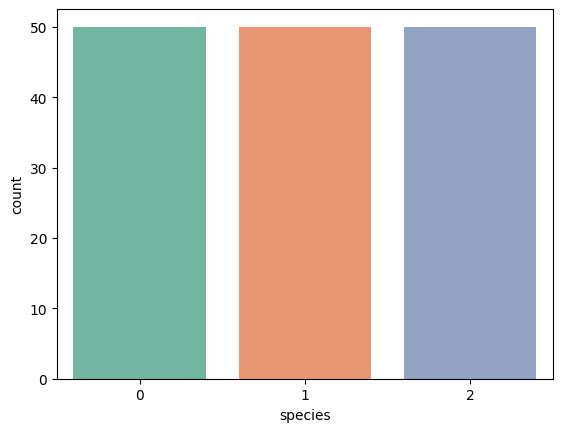

In [14]:
sns.countplot(x= 'species', data = df_data, palette = "Set2")
plt.show()

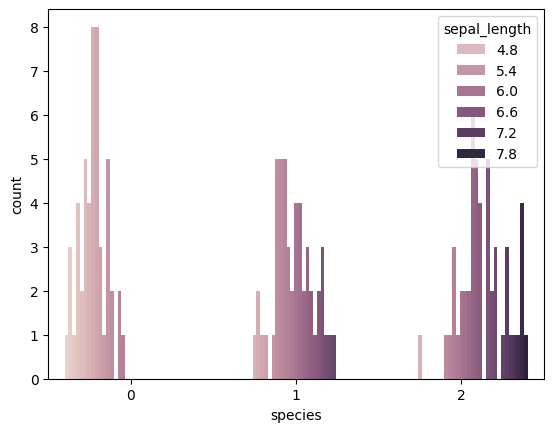

In [15]:
sns.countplot(data = df_data, x = 'species', hue = 'sepal_length')
plt.show()

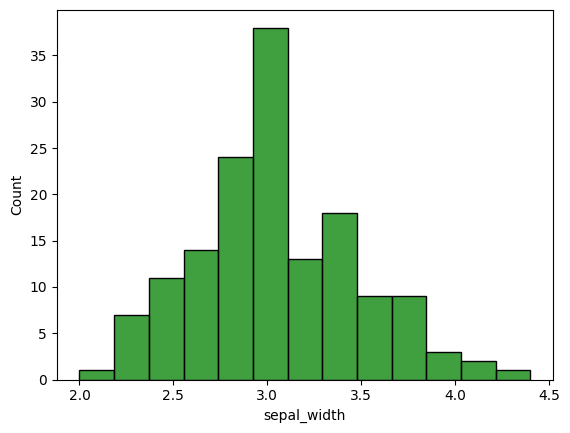

In [16]:
sns.histplot(data = df_data, x = df_data.sepal_width, color = 'Green')
plt.show()

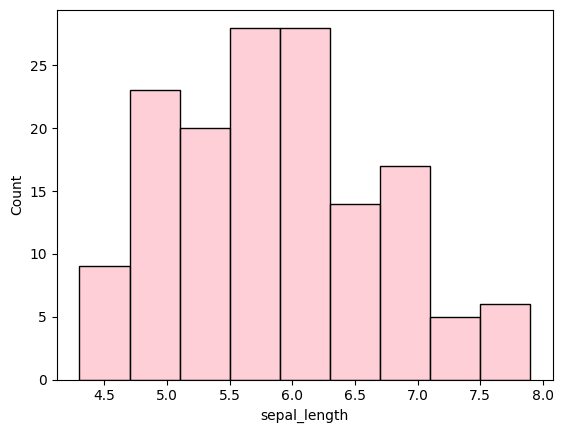

In [17]:
sns.histplot(data = df_data, x = df_data.sepal_length, color = 'Pink')
plt.show()

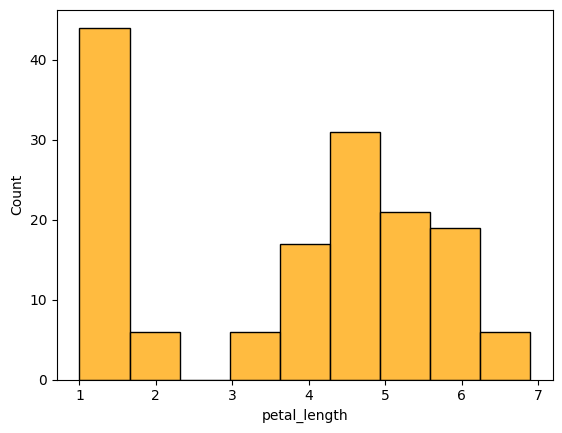

In [18]:
sns.histplot(data = df_data, x = df_data.petal_length, color = 'Orange')
plt.show()

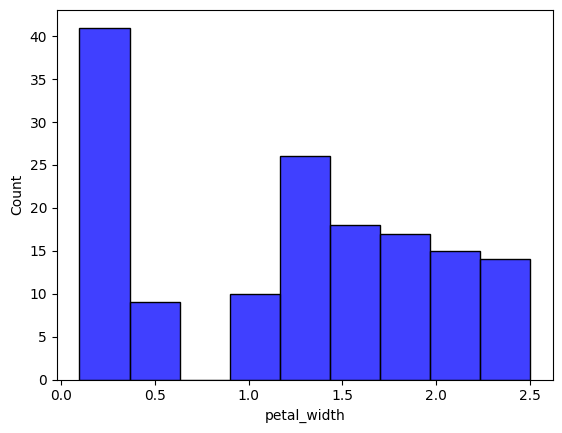

In [19]:
sns.histplot(data = df_data, x = df_data.petal_width, color = 'Blue')
plt.show()

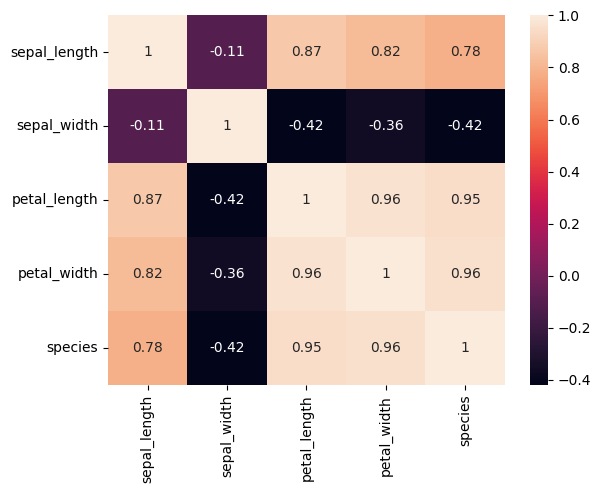

In [20]:
#Create a heatmap to observe the feature-wise correlation in the dataset
corr = df_data.corr()
sns.heatmap(corr, annot = True)
plt.show()

Data preparation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [23]:
#Assigning the predictor and target variable

x = df_data.drop('species', axis = 1)
y = df_data['species']

In [25]:
x_ship, x_boat, y_ship, y_boat = train_test_split(x,y,test_size=0.3)

In [26]:
print(x.shape, x_ship.shape, x_boat.shape)

(150, 4) (105, 4) (45, 4)


Model Building

In [30]:
#Import needed libaries used for Model Building
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
#use the ship data on logisticregression model
model.fit(x_ship, y_ship)

LogisticRegression()

Evaluating and Testing the Model

In [37]:
x_ship_prediction = model.predict(x_ship)

In [38]:
print(x_ship_prediction)

[2 1 1 0 2 2 1 0 1 2 2 0 2 1 2 2 2 1 1 2 0 2 2 2 0 2 0 2 2 1 1 1 0 1 1 0 0
 0 1 1 2 1 2 2 2 2 0 2 0 0 1 2 0 2 2 1 0 0 2 1 0 0 2 0 1 0 0 2 2 2 0 2 1 1
 0 2 0 0 0 1 1 2 2 2 1 2 2 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 2 1]


In [41]:
print("Score for ship data", model.score(x_ship, y_ship))
print("Score for boat data", model.score(x_boat, y_boat))

Score for ship data 0.9714285714285714
Score for boat data 0.9555555555555556


In [42]:
#Import needed libaries used for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
#Building machine learning model and training them

Model2 = RandomForestClassifier(n_estimators = 300 , random_state = 100)
Model2.fit(x_ship, y_ship)

RandomForestClassifier(n_estimators=300, random_state=100)

In [46]:
print("Score for ship data", Model2.score(x_ship, y_ship))
print("Score for boat data", Model2.score(x_boat, y_boat))

Score for ship data 1.0
Score for boat data 0.9555555555555556


In [47]:
#knn k_neighbours
from sklearn.neighbors import KNeighborsClassifier

In [50]:
#Building machine learning model and training them

Model3 = KNeighborsClassifier()
Model3.fit(x_ship, y_ship)

KNeighborsClassifier()

In [51]:
print("Score for ship data", Model3.score(x_ship, y_ship))
print("Score for boat data", Model3.score(x_boat, y_boat))

Score for ship data 0.9714285714285714
Score for boat data 0.9777777777777777


Logistic Regression Model:

The model achieved a training score of 0.9809 and a testing score of 0.97, indicating strong overall performance.
Random Forest Classifier Model:

This model yielded a perfect training score of 1.0, but its testing score was slightly lower at 0.95.
K-Nearest Neighbors (KNN) Model:

The KNN model performed comparatively lower, with both training and testing scores at 0.97.

Conclusion:

The Random Forest Classifier exhibited the highest efficiency on training data but showed a slight drop in testing accuracy.

The Logistic Regression Model provided better accuracy on both training and testing data, making it the more balanced choice.

Model Testing

In [61]:
df_data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [53]:
# For testing, We create a new dataframe with values close to the any of our existing data to evaluate.

data = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data)

In [55]:
# Predict the movie rating by entered data
result = model.predict(trail)

In [60]:
# Display the predicted result from the Model
print("Result Species:", result[0])

Result Species: 0
